# Build ML models - for mostly full 7 KBps window

In [1]:
# !  python3 -m pip install tensorflow
# !  python3 -m pip install keras
# ! python3 -m pip install 'scikit-learn'
# ! python3 -m pip install shap


In [2]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import time
import shap

import sklearn

# import shap


In [3]:
# From /home/michalula/code/epiCausality/epiCode/PIPELINE_extract_plot_mCG_strands_profiles_bigger_window.ipynb
# CGs_all saved as CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy in dimelo_v2_output
# Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)

In [4]:
CGs_all_silenced = np.load("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Theshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy


# 106 CpG units:
# Theshold 0.7 = # (
# Theshold 0.9 =   /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_silenced_T_primerES_nCATS_numFWD5306_numRVS3749_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4723_numRVS3383_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Theshold 0.9 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4511_numRVS3269_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4478_numRVS3217_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 =(("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4220_numRVS3073_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
#
# ('/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')
# Silenced T cells nCATS:
# Threshold 0.7 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD4132_numRVS2965_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# # Threshold 0.9 =( '/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')

CGs_all_silenced, CGs_all_silenced.shape

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan,  1.]]),
 (10089, 142))

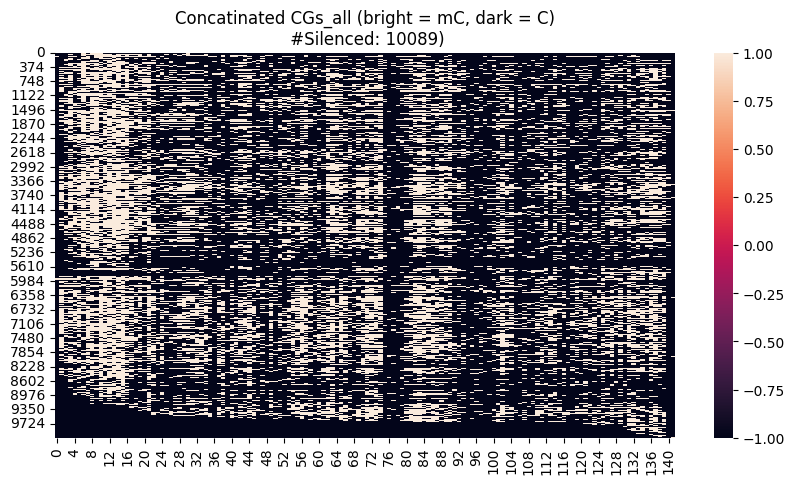

In [5]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


In [6]:
CGs_all_silenced_full = CGs_all_silenced.copy()
CGs_all_silenced_full, CGs_all_silenced_full.shape

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan,  1.]]),
 (10089, 142))

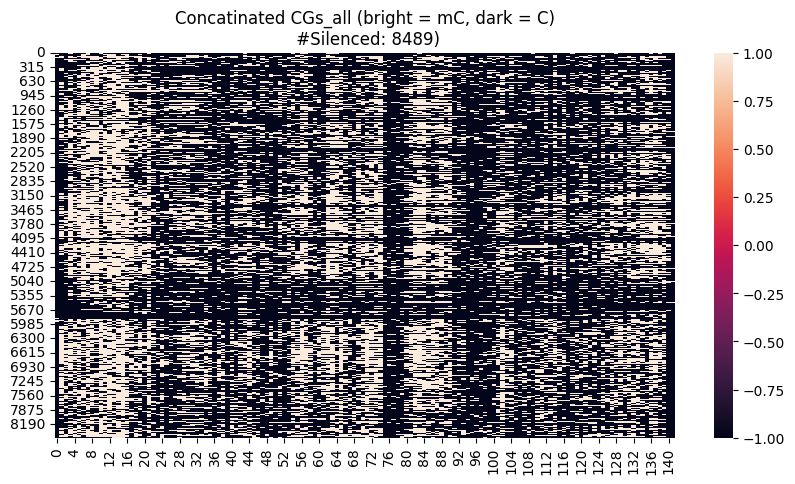

In [7]:
# plot X_unedited_silenced 
Gs_all_silenced_cut = pd.DataFrame(CGs_all_silenced[:-1600])

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(Gs_all_silenced_cut.fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {Gs_all_silenced_cut.shape[0]})")
plt.show()


In [8]:
CGs_all_silenced, CGs_all_silenced.shape

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan,  1.]]),
 (10089, 142))

In [9]:
CGs_all_silenced = np.array(Gs_all_silenced_cut)
CGs_all_silenced, CGs_all_silenced.shape

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  1., nan, nan]]),
 (8489, 142))

In [10]:
CGs_all_unedited = np.load("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")


# 106 CpG units:
# Threshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_unedited_T_primerES_nCATS_numFWD1760_numRVS1398_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1345_numRVS949_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Threshold 0.9 =    "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1058_numRVS795_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD1180_numRVS746_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD881_numRVS598_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")

# ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

# Unedited T cells nCATS:
# Threshold 0.7 =  ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD1081_numRVS662_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# Threshold 0.9 =("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

CGs_all_unedited, CGs_all_unedited.shape

(array([[nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan,  1.]]),
 (3539, 142))

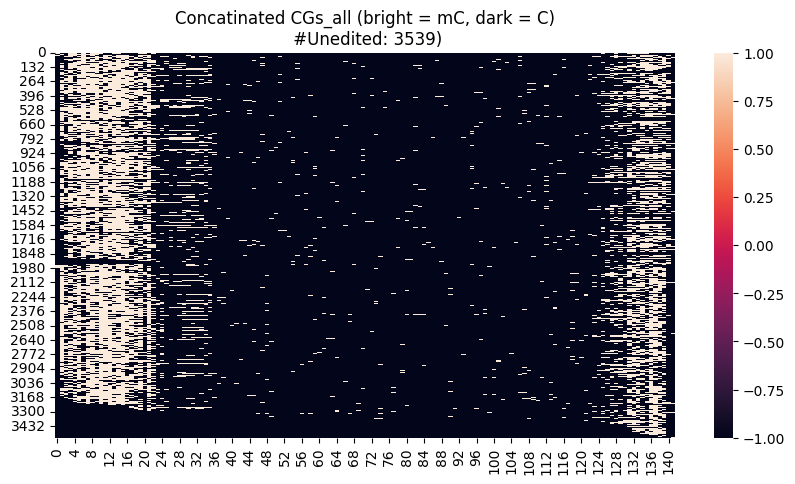

In [11]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_unedited).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited.shape[0]})")
plt.show()


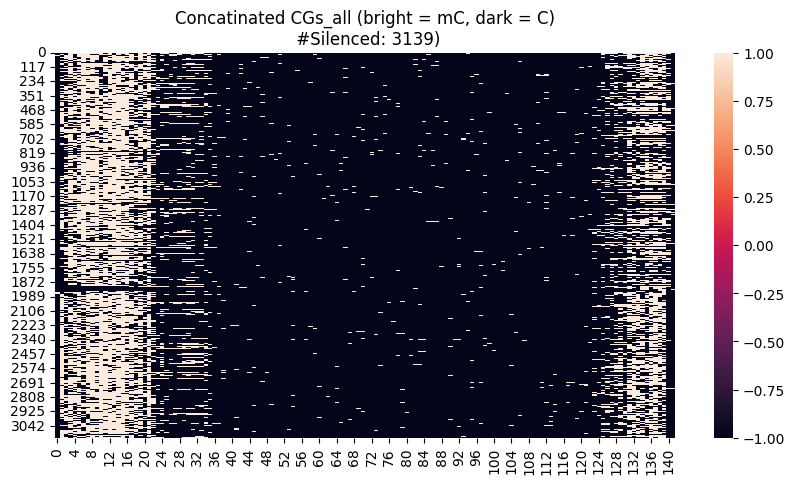

In [12]:
# plot X_unedited_silenced 
CGs_all_unedited_cut = pd.DataFrame(CGs_all_unedited[:-400])

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(CGs_all_unedited_cut.fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_unedited_cut.shape[0]})")
plt.show()


In [13]:
CGs_all_unedited = np.array(CGs_all_unedited_cut)
CGs_all_unedited, CGs_all_unedited.shape

(array([[nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan,  1., nan, ..., nan, nan, nan],
        ...,
        [nan,  1.,  1., ..., nan,  1.,  1.],
        [nan,  1.,  1., ...,  1., nan, nan],
        [nan,  1., nan, ...,  1., nan, nan]]),
 (3139, 142))

In [14]:
# Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
num_rows = CGs_all_silenced.shape[0]  # Total number of rows
subset_size = CGs_all_unedited.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
print('subset_size = ', subset_size)

# Randomly select row indices
random_indices = np.random.choice(num_rows, subset_size, replace=False)

# Get the subset
subset = CGs_all_silenced[random_indices]

# Display the shape to confirm
print(subset.shape)  # Should be (subset_size, 10)

CGs_all_silenced = subset
CGs_all_silenced

subset_size =  3139
(3139, 142)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan,  1., nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan,  1., nan, ...,  1., nan, nan],
       [nan,  1., nan, ...,  1., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [15]:
CGs_all_silenced

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan,  1., nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan,  1., nan, ...,  1., nan, nan],
       [nan,  1., nan, ...,  1., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [16]:
# Undetided T cells nCATS get lable 0 as CD55 is lowly expressed in silened T cells (~90% of cells should be silenced)
y_silenced = np.array([0] * CGs_all_silenced.shape[0])
y_silenced, y_silenced.shape

(array([0, 0, 0, ..., 0, 0, 0]), (3139,))

In [17]:
# Undetided T cells nCATS get lable 1 as CD55 is highly expressed in undetided T cells
y_unedited = np.array([1] * CGs_all_unedited.shape[0])
y_unedited, y_unedited.shape

(array([1, 1, 1, ..., 1, 1, 1]), (3139,))

In [18]:
CGs_all_unedited.shape, CGs_all_silenced.shape

((3139, 142), (3139, 142))

In [19]:
X_unedited_silenced = np.concatenate((CGs_all_unedited, CGs_all_silenced), axis=0)
X_unedited_silenced, X_unedited_silenced.shape

(array([[nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan,  1., nan, ..., nan, nan, nan],
        ...,
        [nan,  1., nan, ...,  1., nan, nan],
        [nan,  1., nan, ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 (6278, 142))

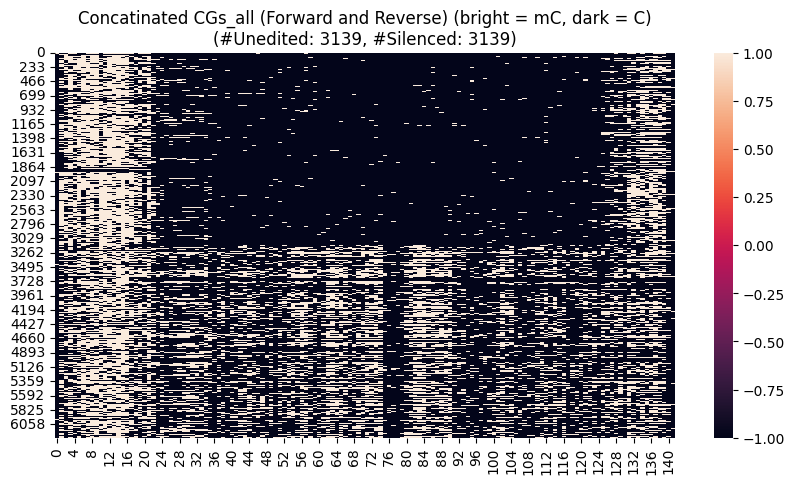

In [20]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(X_unedited_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (Forward and Reverse) (bright = mC, dark = C)\n(#Unedited: {CGs_all_unedited.shape[0]}, #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


In [21]:
y_unedited_silenced = np.concatenate((y_unedited, y_silenced), axis=0)
y_unedited_silenced, y_unedited_silenced.shape

(array([1, 1, 1, ..., 0, 0, 0]), (6278,))

In [22]:
train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16, shuffle=True)
train_idx, test_idx, len(train_idx), len(test_idx)

(array([ 250, 1714, 1336, ..., 1345,  581, 2169]),
 array([1270, 5897, 4031, ..., 2639, 1186, 3288]),
 4708,
 1570)

In [23]:
X = pd.DataFrame(X_unedited_silenced).fillna(-1)
y = y_unedited_silenced

In [24]:
X.iloc[16:23,:]

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
16,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
17,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
18,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
19,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
20,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0
21,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
22,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,...,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0


In [25]:
X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]

In [26]:
def predict_reg(f, X, y):
    preds = f.predict(X)
    preds_round = np.round(preds) # / 50) # 100-->2; 50-->1; 0-->0
    # print('preds=', preds[:16])
    # print('preds_round', preds_round[:16])
    # print('np.mean(preds_round==y)*100 =', np.mean(preds_round==y)*100)
    # print('y', y[:16])
    # preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    # print('preds012', preds012[:16])
    # print('np.mean(preds012*50==y)*100 =', np.mean(preds012*50==y)*100)
    return np.mean(preds_round==y)*100

model = LinearRegression().fit(X_train,y_train)
print("GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = DecisionTreeRegressor().fit(X_train,y_train)
print("Tree: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = RandomForestRegressor().fit(X_train,y_train)
print("RF: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = GradientBoostingRegressor().fit(X_train,y_train)
print("GBM: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, y_train)
print("NN: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = LogisticRegression(max_iter=1000, penalty="l1", solver='saga').fit(X_train,y_train)
print("Sparse GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

GLM: 93.06%
####
Tree: 88.47%
####
RF: 91.91%
####
GBM: 93.12%
####
NN: 91.34%
####


Sparse GLM: 92.80%


In [27]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_)), print(len(model.coef_[0]))

[[ 39  72  57  70 112  44  74  89  75  92  51  91  84 105   1 114  54 101
   43  22  82 136 117  73 138   2 130  63  90  40 133 132 129 125  66  58
   65  24 115  41 139  19  47  53  46  42   4  27  35   6 111   5  26  69
   64 135  81 102 140  32  23  10 134 128  36  16  11   8  67   3 137  85
   86  28  12 131   7 113 122  13 126  20  55 100  71  45 127  14  34  18
  124  31   9  15 116  17  59  33  48 120  38  62  61 109  21  49  25  96
  121 118  52  50  95  94  93  88  37  29  30  56  60  78  68  76  77  83
   79  80 123 119  98  99 108 107 106  97 104 103 110  87 141 142]]
[[5.61577333e-01 4.05581401e-01 1.43083797e-01 2.56531139e-01
  2.38756979e-01 2.50235042e-01 1.03523700e-01 1.46536423e-01
  5.16260221e-02 1.89317418e-01 1.48369091e-01 1.08766221e-01
  8.63259268e-02 6.25358684e-02 4.21813078e-02 1.67574715e-01
  3.99213126e-02 6.17133606e-02 2.83915315e-01 8.29699895e-02
  1.45725934e-02 4.98760044e-01 1.90884069e-01 3.11192747e-01
  9.71775386e-03 2.37932424e-01 2.51500320

(None, None)

In [28]:
celltypes = ["unedited", "silenced"]
celltypes

['unedited', 'silenced']

In [29]:
# model.coef_

In [30]:
np.arange(1, 11)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [31]:
(model.coef_).shape[1]

142

In [32]:
X_axis = np.arange(1, model.coef_.shape[1]+1)# +1 # np.arange(10)+1
X_axis

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142])

In [33]:
np.abs(model.coef_)

array([[5.61577333e-01, 4.05581401e-01, 1.43083797e-01, 2.56531139e-01,
        2.38756979e-01, 2.50235042e-01, 1.03523700e-01, 1.46536423e-01,
        5.16260221e-02, 1.89317418e-01, 1.48369091e-01, 1.08766221e-01,
        8.63259268e-02, 6.25358684e-02, 4.21813078e-02, 1.67574715e-01,
        3.99213126e-02, 6.17133606e-02, 2.83915315e-01, 8.29699895e-02,
        1.45725934e-02, 4.98760044e-01, 1.90884069e-01, 3.11192747e-01,
        9.71775386e-03, 2.37932424e-01, 2.51500320e-01, 1.20797308e-01,
        0.00000000e+00, 0.00000000e+00, 5.17359703e-02, 2.04504512e-01,
        3.05704806e-02, 6.22418492e-02, 2.50518553e-01, 1.68510745e-01,
        0.00000000e+00, 2.04366824e-02, 1.08821889e+00, 3.69887101e-01,
        2.93470917e-01, 2.56707792e-01, 5.00954029e-01, 7.66199653e-01,
        7.45668679e-02, 2.65965179e-01, 2.76313587e-01, 2.54378983e-02,
        9.83900271e-03, 0.00000000e+00, 6.48501301e-01, 0.00000000e+00,
        2.72606907e-01, 5.16537872e-01, 8.16656034e-02, 0.000000

/tmp/ipykernel_2360372/3999952595.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


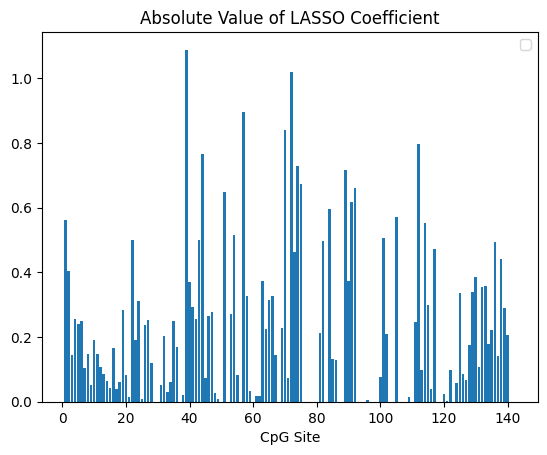

In [34]:

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis, np.abs(model.coef_[0])) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
# plt.xticks(X_axis)
plt.show()

In [35]:


def print_accuracy(f):
    print(f"Accuracy = {100 * np.sum(f(X_test) == y_test) / len(y_test)}%")
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

In [36]:
# # K-nearest neighbors
# knn = sklearn.neighbors.KNeighborsClassifier()
# knn.fit(X_train, y_train)

# print_accuracy(knn.predict)
# Accuracy = 96.66666666666667 # %
# # Explain a single prediction from the test set
# explainer = shap.KernelExplainer(knn.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test.iloc[0, :])
# shap.force_plot(explainer.expected_value[0], shap_values[:, 0], X_test.iloc[0, :])

# # Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
# # Explain all the predictions in the test set
# shap_values = explainer.shap_values(X_test)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

# # sample order by similarity

# # f(x)
# # Support vector machine with a linear kernel
# svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)
# svc_linear.fit(X_train, y_train)
# print_accuracy(svc_linear.predict)

# # explain all the predictions in the test set
# explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)
# # this is multiclass so we only visualize the contributions to first class (hence index 0)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

Text(0.5, 1.0, 'Global SHAP Importances')

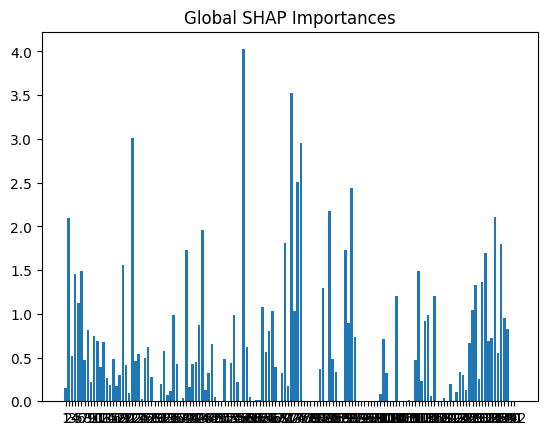

In [37]:
# import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test[:100])

sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.title("Global SHAP Importances")

# Add a 1D CNN model + interpret

In [38]:
# # Add a 1D CNN model + interpret
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.utils import shuffle
# from sklearn.inspection import permutation_importance

# # # Create dummy data
# # x_train = np.random.rand(1000, 10, 1)
# # y_train = np.random.rand(1000) * 100

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=x_train.shape), #(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile and train the model
# model.compile(optimizer='adam', loss='mse')
# model.fit(x_train, y_train, epochs=10, batch_size=32)

# # Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # To fix the error, change the score_func
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # Create a copy of x_train reshaped for scoring
# x_train_reshaped = x_train.reshape((1000, 10))

# # Calculate permutation importance
# results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)

# # Output feature importance
# importance = results.importances_mean
# for i, imp in enumerate(importance):
#     print(f"Feature {i+1} importance: {imp}")

To enhance the provided code with a test set and plotting of evaluation metrics, specifically the mean squared error (MSE) on both training and test datasets, you can follow these steps. I'll use Matplotlib for plotting.


In [39]:

# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.model_selection import train_test_split

# # Create dummy data
# x = np.random.rand(1200, 10, 1)
# y = np.random.rand(1200) * 100

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model and save history
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# # Plot the training and validation loss
# plt.plot(history.history['loss'], label='Train MSE')
# plt.plot(history.history['val_loss'], label='Test MSE')
# plt.title('Model MSE')
# plt.ylabel('Mean Squared Error')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.show()

In [40]:
# Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))
# # To fix the error, change the score_func:
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# # # Create a copy of x_train reshaped for scoring
# X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))

# # Calculate permutation importance
# results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
# Use X_train directly without reshaping
results = permutation_importance(model, np.asarray(X_train), np.asarray(y_train), scoring=score_func)


# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")

Feature 1 importance: -0.00046728971962616965
Feature 2 importance: -0.0032710280373831765
Feature 3 importance: 0.0014868309260832643
Feature 4 importance: -0.0003398470688190311
Feature 5 importance: 0.0007646559048428203
Feature 6 importance: 0.0012319456244689899
Feature 7 importance: 0.0010195412064570946
Feature 8 importance: 0.0
Feature 9 importance: 0.0002124044180118953
Feature 10 importance: 0.001104502973661854
Feature 11 importance: 0.0006372132540356845
Feature 12 importance: -8.496176720475813e-05
Feature 13 importance: 0.0005522514868309278
Feature 14 importance: 0.00016992353440951625
Feature 15 importance: 0.0002124044180118953
Feature 16 importance: -0.0004672897196261683
Feature 17 importance: 0.00012744265080713718
Feature 18 importance: 0.00025488530161427435
Feature 19 importance: -0.0001274426508071358
Feature 20 importance: 8.496176720475813e-05
Feature 21 importance: 4.248088360237906e-05
Feature 22 importance: -0.0044604927782497875
Feature 23 importance: 0.00

In [41]:
import numpy as np
from sklearn.inspection import permutation_importance

# Ensure X_train is a NumPy array
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Define scoring function
def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# Check shape before calling permutation_importance
print("X_train shape:", X_train.shape)

# Calculate permutation importance
results = permutation_importance(model, X_train, y_train, scoring=score_func)

# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")


X_train shape: (4708, 142)


Feature 1 importance: -0.0006372132540356831
Feature 2 importance: -0.0036108751062022076
Feature 3 importance: 0.0012319456244689899
Feature 4 importance: -0.0001274426508071358
Feature 5 importance: 0.00025488530161427435
Feature 6 importance: 0.0005947323704333055
Feature 7 importance: 0.0008071367884452008
Feature 8 importance: -0.0007221750212404426
Feature 9 importance: 0.00046728971962616965
Feature 10 importance: 0.0008071367884452008
Feature 11 importance: 0.0011894647408666123
Feature 12 importance: 0.00025488530161427435
Feature 13 importance: 0.0003398470688190325
Feature 14 importance: 4.248088360237906e-05
Feature 15 importance: 0.00012744265080713718
Feature 16 importance: -0.0009770603228547157
Feature 17 importance: -0.0002973661852166534
Feature 18 importance: 0.00012744265080713718
Feature 19 importance: -0.0007221750212404413
Feature 20 importance: 0.0004248088360237906
Feature 21 importance: -8.496176720475813e-05
Feature 22 importance: -0.004970263381478332
Featur

In [42]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, num_features)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)

X_train shape: (4708, 142)
y_train shape: (4708,)


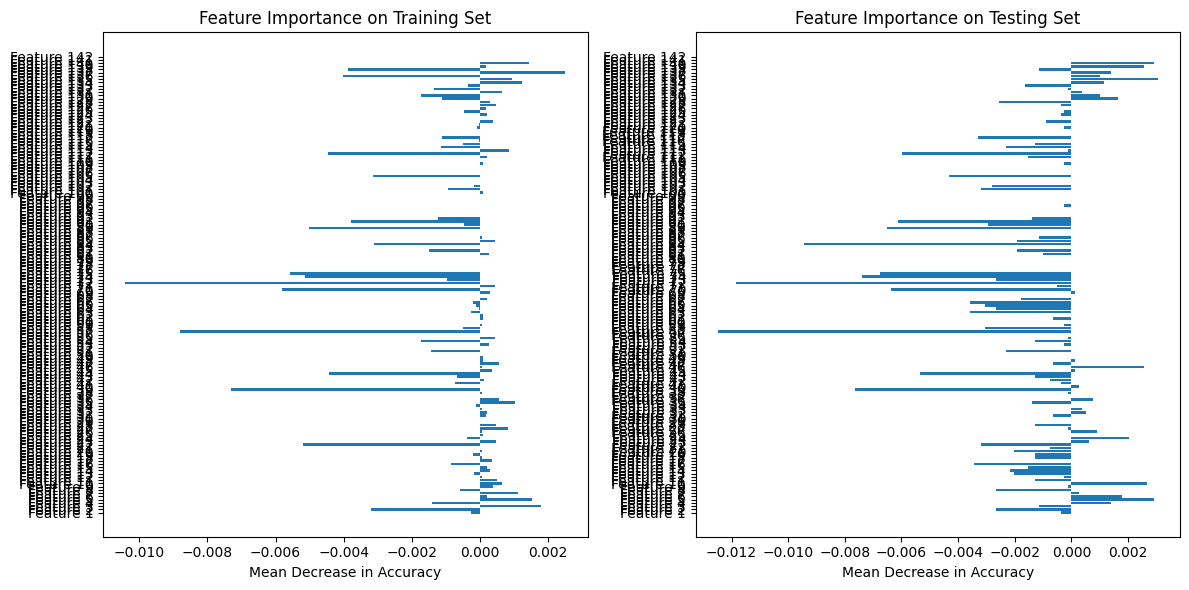

In [43]:
# To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# # Assume x and y are your full dataset and labels
# x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape for scoring
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1]))

# Calculate permutation importance on training data
train_results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test_reshaped, y_test, scoring=score_func)

# Plotting
features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.tight_layout()
plt.show()

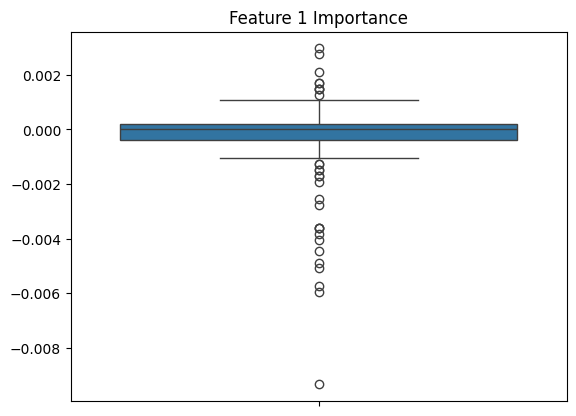

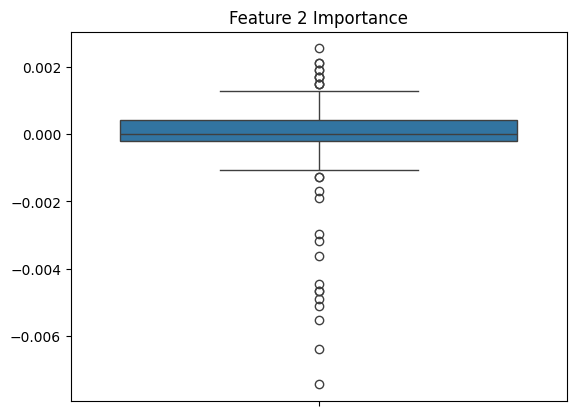

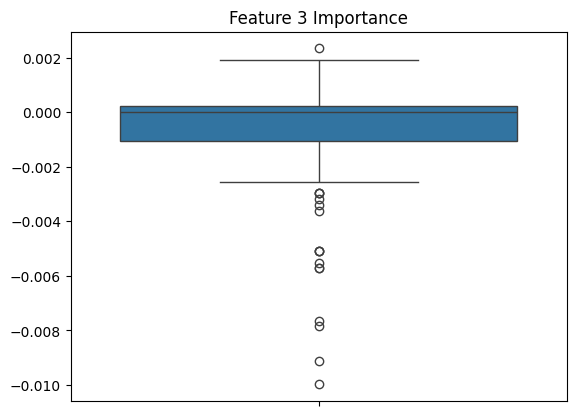

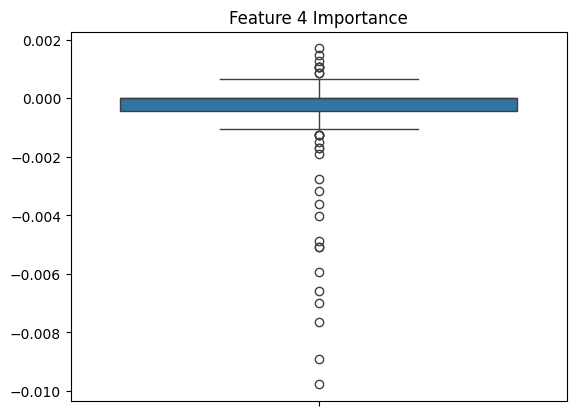

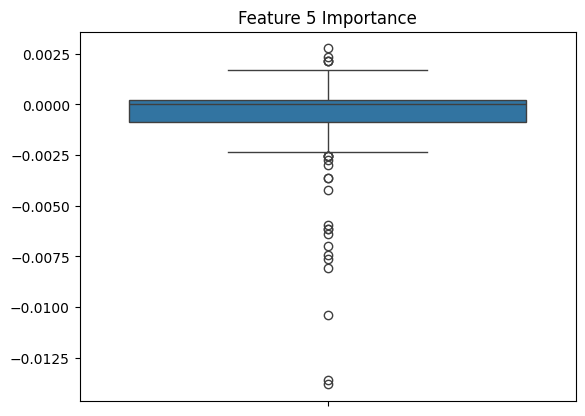

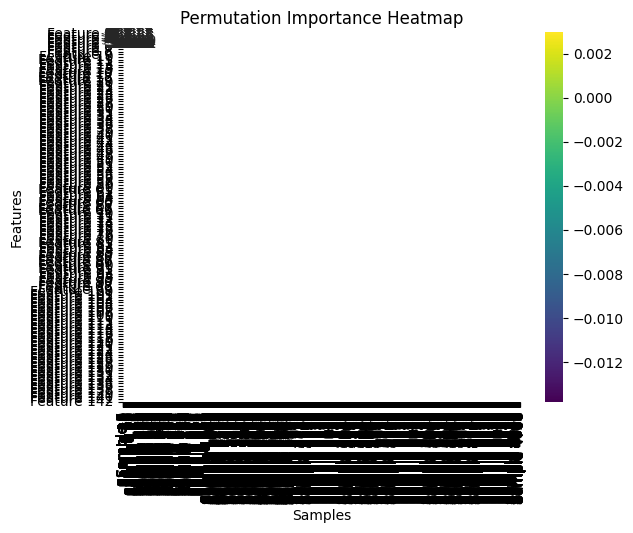

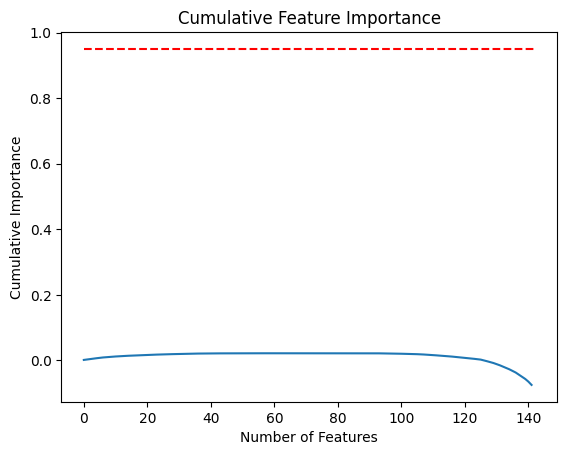

In [44]:
# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# Box Plot:
# A box plot can show the distribution of permutation importances across multiple runs, giving you a sense of variability in feature importance.
import seaborn as sns

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

train_results = permutation_importance(model, X_train, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test, y_test, scoring=score_func)

# Assuming 'results' is the output from permutation_importance
# for i in range(x_train_reshaped.shape[1]):
#     sns.boxplot(data=results.importances[:, i], orient='v')
#     plt.title(f'Feature {i+1} Importance')
#     plt.show()
# Correctly access the importances array
num_features = results.importances.shape[1]  # This ensures you are within the correct range

for i in range(num_features):
    sns.boxplot(data=results.importances[:, i], orient='v')
    plt.title(f'Feature {i+1} Importance')
    plt.show()

# Feature Importance Heatmap:
# If your dataset isn't too large, you can visualize the importance across multiple features and samples using a heatmap.
import seaborn as sns
# Create a heatmap of the feature importance scores
sns.heatmap(results.importances.T, annot=True, cmap='viridis', fmt=".3f",
            xticklabels=[f"Sample {i+1}" for i in range(X_train.shape[0])],
            yticklabels=[f"Feature {i+1}" for i in range(X_train.shape[1])])
plt.title('Permutation Importance Heatmap')
plt.xlabel('Samples')
plt.ylabel('Features')
plt.show()

# Cumulative Importance Plot:
# This plot can help identify the number of features required to reach a certain threshold of total importance.
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()
# These visualizations provide different perspectives on feature importance, helping you to better understand which features contribute most to the model and how stable their contributions are across different data subsets.


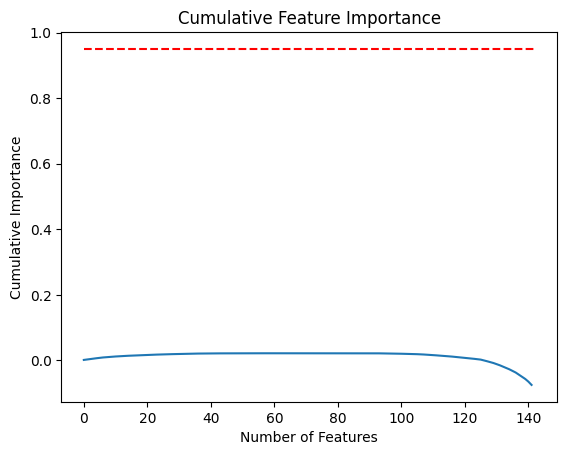

In [45]:
# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()

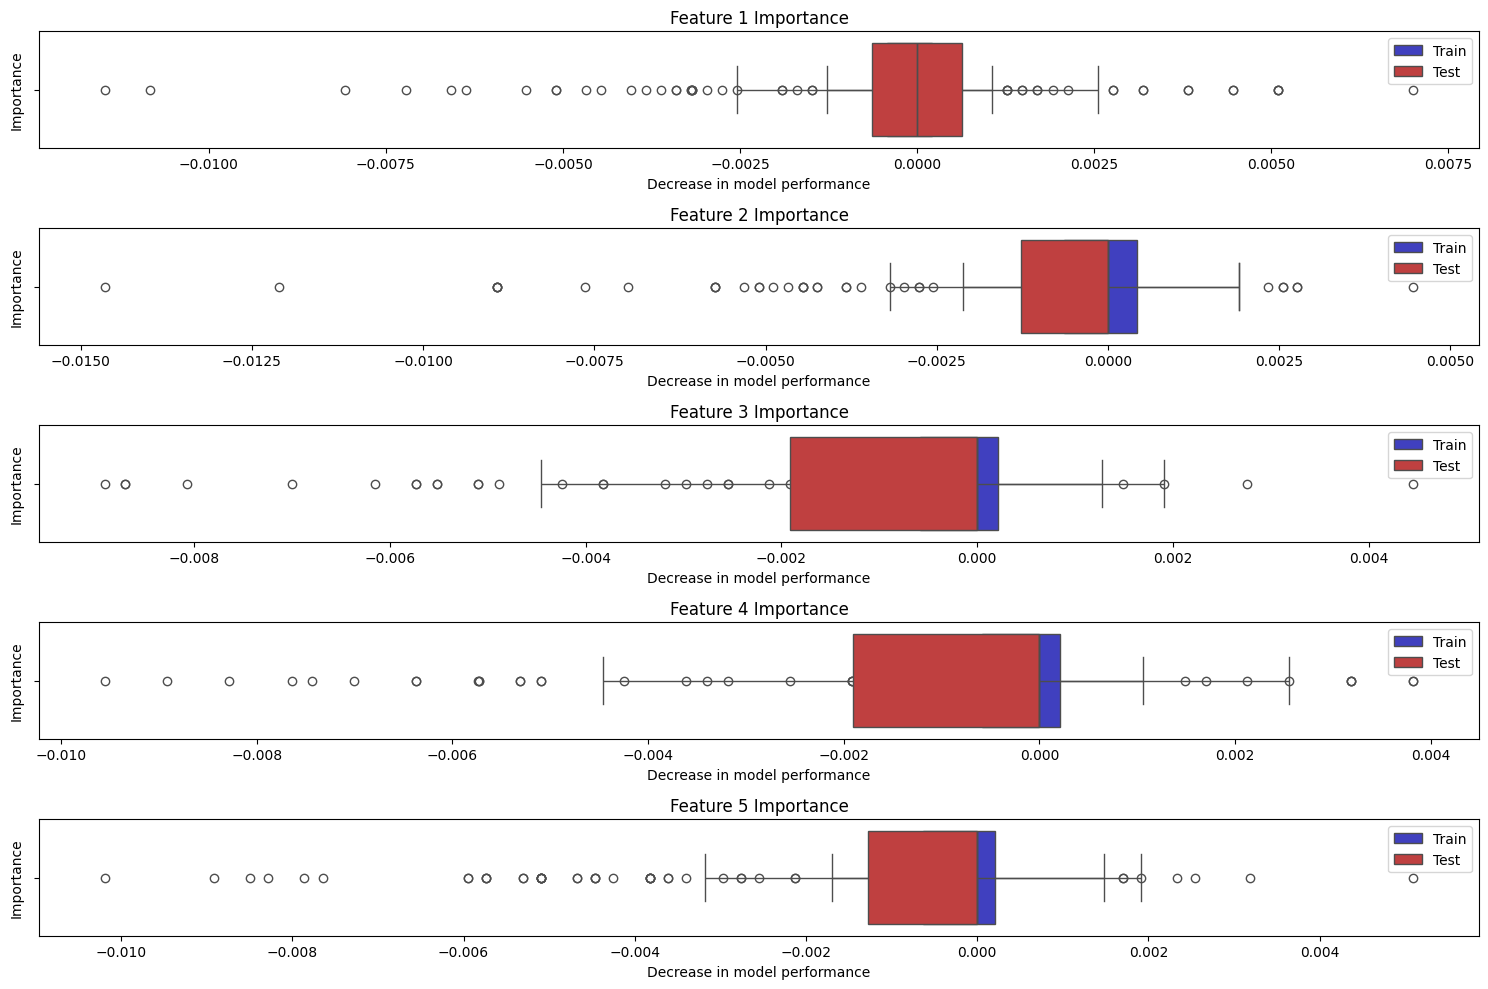

In [46]:
# To properly visualize permutation importance for both training and testing data in your machine learning model, let's refine the existing code to ensure correct use of both train_results and test_results. We will also plot these results side by side for each feature for better comparison.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_results' and 'test_results' are already calculated
num_features = train_results.importances.shape[1]

plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    # Plotting training data importance
    sns.boxplot(data=train_results.importances[:, i], color='blue', orient='h', saturation=0.5)
    # Plotting test data importance
    sns.boxplot(data=test_results.importances[:, i], color='red', orient='h', saturation=0.5)
    plt.title(f'Feature {i+1} Importance')
    plt.xlabel('Decrease in model performance')
    plt.ylabel('Importance')
    plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# Explanation:
# Box Plot Modifications: Each feature's importance from both the training and testing datasets is plotted side by side to directly compare their distributions and see how the model reacts to the shuffling of each feature set.
# Layout Adjustments: Using plt.subplot() to plot each feature's importance on a separate subplot for clarity.
# Color Coding: Different colors for training and testing datasets help in distinguishing between the two, enhancing visual understanding.
# This code modification will help you clearly visualize how the permutation importance varies between training and testing datasets, thereby providing insights into model generalization and potential overfitting.

In [47]:
features, test_results.importances_mean


(['Feature 1',
  'Feature 2',
  'Feature 3',
  'Feature 4',
  'Feature 5',
  'Feature 6',
  'Feature 7',
  'Feature 8',
  'Feature 9',
  'Feature 10',
  'Feature 11',
  'Feature 12',
  'Feature 13',
  'Feature 14',
  'Feature 15',
  'Feature 16',
  'Feature 17',
  'Feature 18',
  'Feature 19',
  'Feature 20',
  'Feature 21',
  'Feature 22',
  'Feature 23',
  'Feature 24',
  'Feature 25',
  'Feature 26',
  'Feature 27',
  'Feature 28',
  'Feature 29',
  'Feature 30',
  'Feature 31',
  'Feature 32',
  'Feature 33',
  'Feature 34',
  'Feature 35',
  'Feature 36',
  'Feature 37',
  'Feature 38',
  'Feature 39',
  'Feature 40',
  'Feature 41',
  'Feature 42',
  'Feature 43',
  'Feature 44',
  'Feature 45',
  'Feature 46',
  'Feature 47',
  'Feature 48',
  'Feature 49',
  'Feature 50',
  'Feature 51',
  'Feature 52',
  'Feature 53',
  'Feature 54',
  'Feature 55',
  'Feature 56',
  'Feature 57',
  'Feature 58',
  'Feature 59',
  'Feature 60',
  'Feature 61',
  'Feature 62',
  'Feature 63',
 

In [48]:
X_axis


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142])

/tmp/ipykernel_2360372/3474026278.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


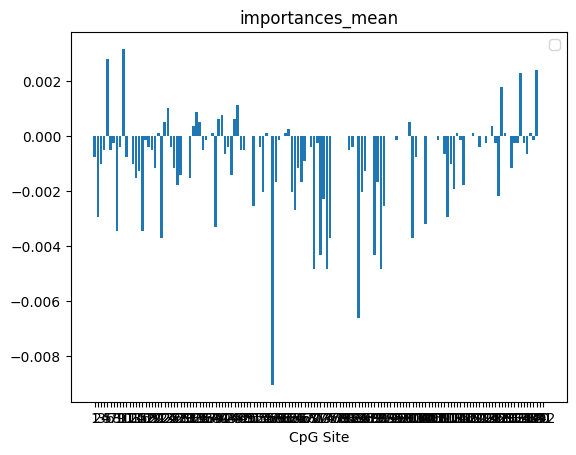

In [49]:
# for i in range(1,3):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis, test_results.importances_mean) # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()

In [50]:
shifts

[-0.4, -0.15]

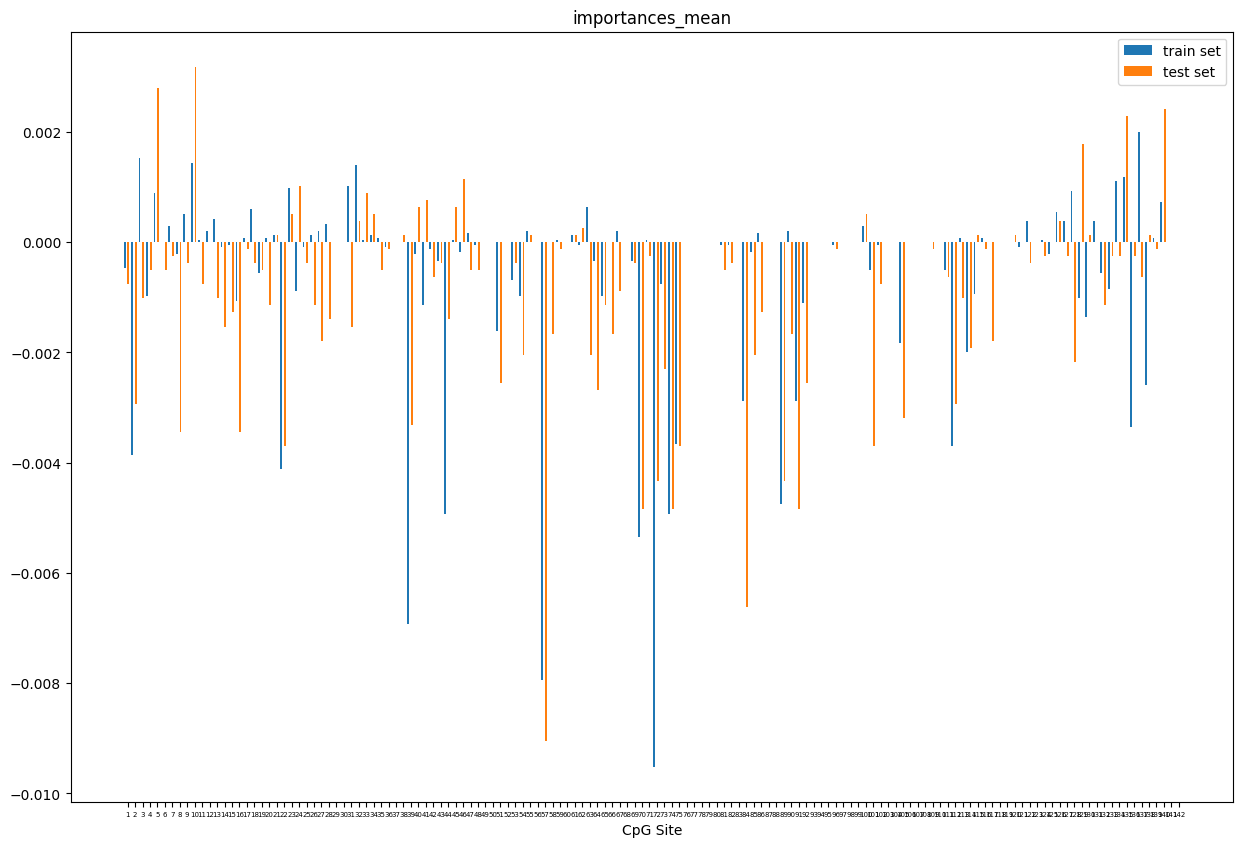

In [51]:
shifts =  [-0.4, 0.1]
# [-0.4, -0.15, 0.1]
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.figure(figsize=(15, 10))

plt.bar(X_axis+shifts[0], train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

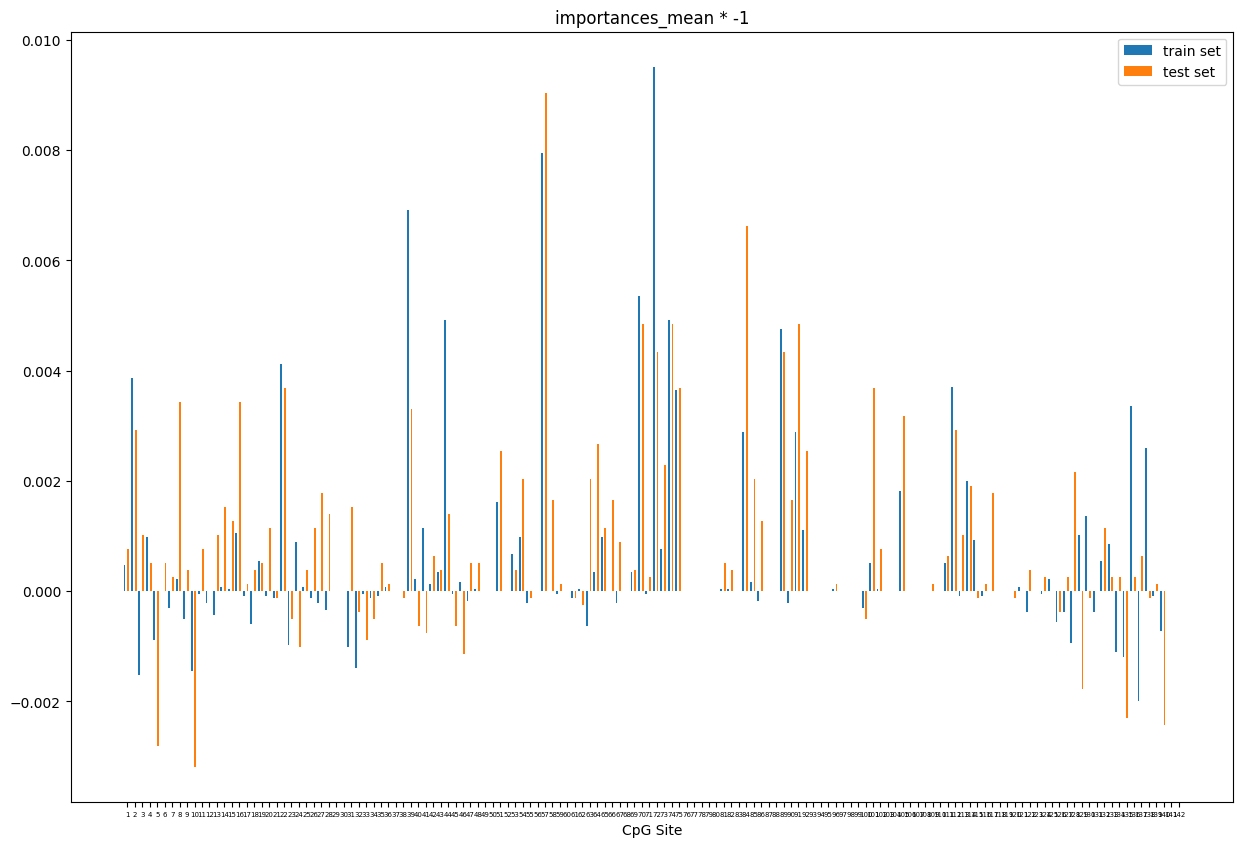

In [52]:
plt.figure(figsize=(15, 10))
plt.bar(X_axis+shifts[0], (-1)*train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], (-1)*test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean * -1")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

In [53]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_))

[[ 39  72  57  70 112  44  74  89  75  92  51  91  84 105   1 114  54 101
   43  22  82 136 117  73 138   2 130  63  90  40 133 132 129 125  66  58
   65  24 115  41 139  19  47  53  46  42   4  27  35   6 111   5  26  69
   64 135  81 102 140  32  23  10 134 128  36  16  11   8  67   3 137  85
   86  28  12 131   7 113 122  13 126  20  55 100  71  45 127  14  34  18
  124  31   9  15 116  17  59  33  48 120  38  62  61 109  21  49  25  96
  121 118  52  50  95  94  93  88  37  29  30  56  60  78  68  76  77  83
   79  80 123 119  98  99 108 107 106  97 104 103 110  87 141 142]]
[[5.61577333e-01 4.05581401e-01 1.43083797e-01 2.56531139e-01
  2.38756979e-01 2.50235042e-01 1.03523700e-01 1.46536423e-01
  5.16260221e-02 1.89317418e-01 1.48369091e-01 1.08766221e-01
  8.63259268e-02 6.25358684e-02 4.21813078e-02 1.67574715e-01
  3.99213126e-02 6.17133606e-02 2.83915315e-01 8.29699895e-02
  1.45725934e-02 4.98760044e-01 1.90884069e-01 3.11192747e-01
  9.71775386e-03 2.37932424e-01 2.51500320

In [54]:
celltypes

['unedited', 'silenced']

In [55]:
# for i in range(2):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.legend()
# plt.title("Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis)
# plt.show()

In [56]:

# train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16)
# train_idx, test_idx

In [57]:
# # To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.inspection import permutation_importance
# from sklearn.model_selection import train_test_split

# # # Assume x and y are your full dataset and labels
# # x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Reshape for scoring
# x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]))
# x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# # Plotting
# features = [f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])]
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.barh(features, train_results.importances_mean)
# plt.title('Feature Importance on Training Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.subplot(1, 2, 2)
# plt.barh(features, test_results.importances_mean)
# plt.title('Feature Importance on Testing Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.tight_layout()
# plt.show()